# Fake News Detection 


In [59]:
#Importing Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
import gensim
import nltk

from gensim.utils import simple_preprocess
from string import punctuation
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [60]:
#Importing Datasets
df_fake = pd.read_csv("C:/Users/Hp/OneDrive/Desktop/Internship/Fake.csv")
df_true = pd.read_csv("C:/Users/Hp/OneDrive/Desktop/Internship/True.csv")

In [61]:
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [62]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [63]:
df_fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [64]:
df_true.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [65]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [66]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [67]:
df_true['label'] = 'Real'
df_fake['label'] = 'Fake'

In [68]:
df_true.isnull().any()

title      False
text       False
subject    False
date       False
label      False
dtype: bool

In [69]:
df_fake.isnull().any()

title      False
text       False
subject    False
date       False
label      False
dtype: bool

In [70]:
#Combining the two datasets
df_com=pd.concat([df_true,df_fake]).reset_index(drop=True)

In [71]:
df_com.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",Real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",Real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",Real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Real


### VISUALIZATION

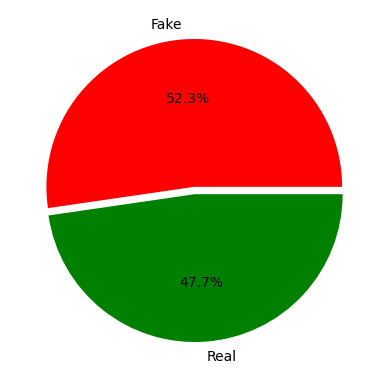

In [72]:
pie = plt.pie(df_com["label"].value_counts().values,explode=[0.05,0],labels=df_com['label'].value_counts().index, autopct='%1.1f%%',colors=['Red','Green'])

Text(0.5, 0, 'Label')

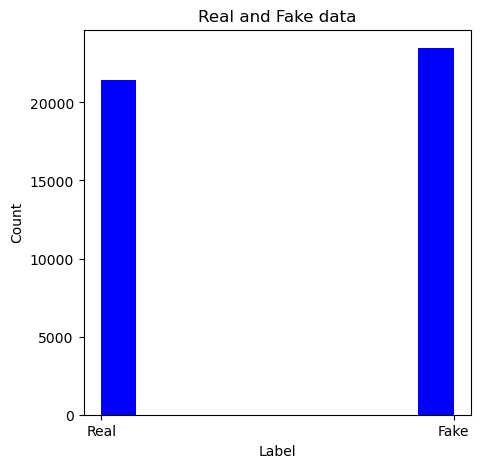

In [73]:
fig = plt.figure(figsize=(5,5))
plt.hist(df_com['label'],color = "blue");
plt.title("Real and Fake data")
plt.ylabel("Count")
plt.xlabel("Label")

Text(0.5, 0, 'subject')

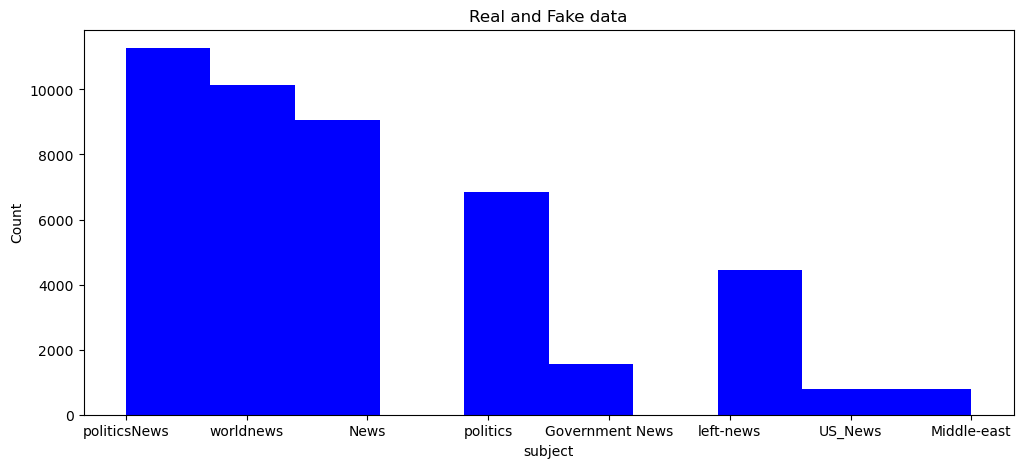

In [74]:
fig = plt.figure(figsize=(12,5))
plt.hist(df_com['subject'],color = "blue");
plt.title("Real and Fake data")
plt.ylabel("Count")
plt.xlabel("subject")

Text(0.5, 0, 'label')

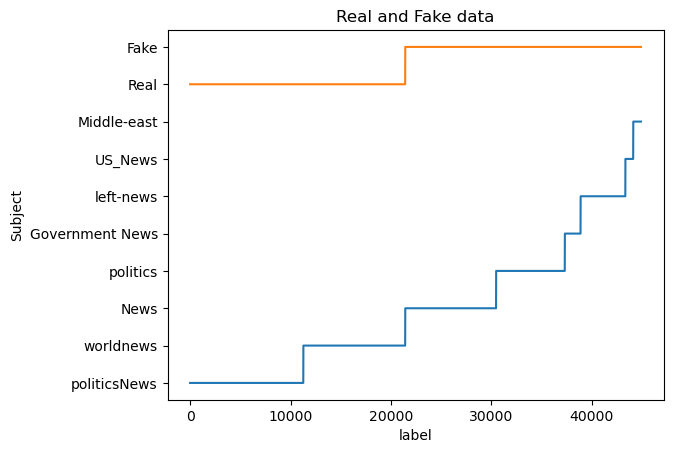

In [75]:
plt.plot(df_com['subject'])
plt.plot(df_com['label'])
plt.title("Real and Fake data")
plt.ylabel("Subject")
plt.xlabel("label")

In [76]:
#combing the title and text together
df_com['texttitle']=df_com['title']+' '+df_com['text']
df_com.head()

,title,text,subject,date,label,texttitle
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",Real,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",Real,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Real,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",Real,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Real,Trump wants Postal Service to charge 'much mor...


### Data Cleaning

In [77]:
def dc(data):
    sw=stopwords.words('english')
    res=[]
    for word in gensim.utils.simple_preprocess(data):
        if word not in sw and len(word)>3:
            res.append(word)
    return res

In [78]:
df_com['texttitle'] = df_com['texttitle'].apply(dc)

In [79]:
df_com.head()

,title,text,subject,date,label,texttitle
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",Real,"[budget, fight, looms, republicans, flip, fisc..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",Real,"[military, accept, transgender, recruits, mond..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Real,"[senior, republican, senator, mueller, washing..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",Real,"[russia, probe, helped, australian, diplomat, ..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Real,"[trump, wants, postal, service, charge, much, ..."


In [80]:
df_com['words'] = df_com['texttitle'].apply(lambda x: " ".join(x))
df_com.head()

,title,text,subject,date,label,texttitle,words
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",Real,"[budget, fight, looms, republicans, flip, fisc...",budget fight looms republicans flip fiscal scr...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",Real,"[military, accept, transgender, recruits, mond...",military accept transgender recruits monday pe...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Real,"[senior, republican, senator, mueller, washing...",senior republican senator mueller washington r...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",Real,"[russia, probe, helped, australian, diplomat, ...",russia probe helped australian diplomat washin...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Real,"[trump, wants, postal, service, charge, much, ...",trump wants postal service charge much amazon ...


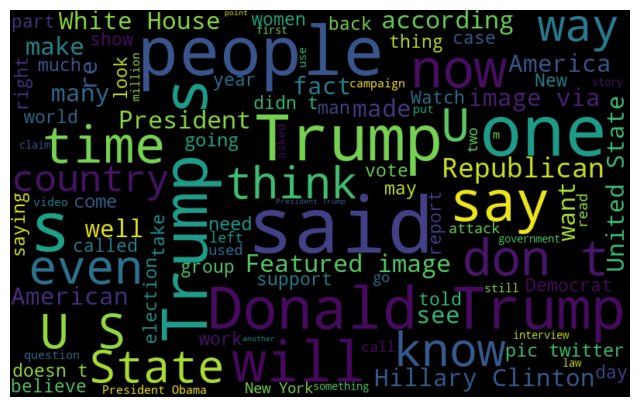

In [81]:
### Visualization of most commen word used in Fake statement
df_fake = df_com[df_com['label'] == 'Fake']
df_fake = ''.join([texttitle for texttitle in df_fake.text])
wordcloud = WordCloud(width=800, height=500, max_font_size=100, max_words=100).generate(df_fake)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

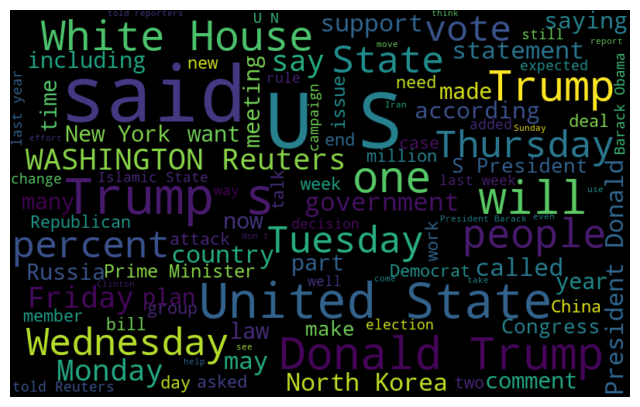

In [82]:
### Visualization of most commen word used in Real statement
df_Real = df_com[df_com['label'] == 'Real']
df_Real = ''.join([texttitle for texttitle in df_Real.text])
wordcloud = WordCloud(width=800, height=500, max_font_size=100, max_words=100).generate(df_Real)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Accuracy of the Model

In [102]:
X =df_com['text']
y =df_com['label']

X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [103]:
list_of_words = []
for news in df_com.texttitle:
    for word in news:
        list_of_words.append(word)
totalwords=len(set(list_of_words))
totalwords

108884

In [104]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=7)

In [106]:
viz = TfidfVectorizer()


tfidf_train = viz.fit_transform(x_train.iloc[:,0])
tfidf_test = viz.transform(x_test.iloc[:,0])

In [107]:
pac = PassiveAggressiveClassifier(random_state = 7,loss = 'squared_hinge',  max_iter = 50, C = 0.16)
pac.fit(tfidf_train, y_train.values.ravel())

PassiveAggressiveClassifier(C=0.16, loss='squared_hinge', max_iter=50,
                            random_state=7)

In [108]:
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)

print(f'Accuracy: {round(score*100, 2)}%')

Accuracy: 99.54%


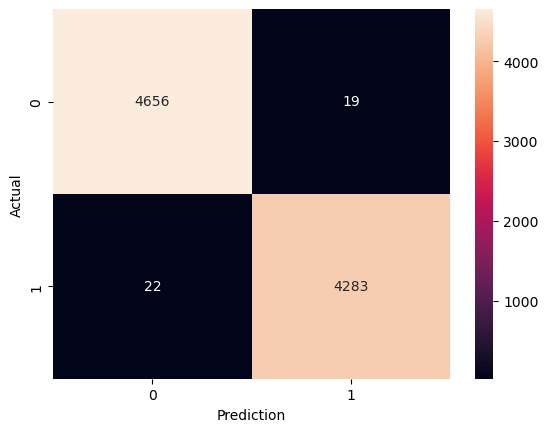

In [109]:
ax = sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt="d")
ax.set(xlabel='Prediction', ylabel='Actual')
plt.show()